In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline


In [3]:
house_price = pd.read_csv('House_price.csv')
house_price.head()

,HouseAge,Bedroom,FullBath,LotArea,Location,SalePrice
0,2003,3,2,8450,Urban,208500
1,1976,3,2,9600,SubUrban,181500
2,2001,3,2,11250,Rural,223500
3,1915,3,1,9550,Urban,140000
4,2000,4,2,14260,SubUrban,250000


In [4]:
df = house_price.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   HouseAge   1460 non-null   int64 
 1   Bedroom    1460 non-null   int64 
 2   FullBath   1460 non-null   int64 
 3   LotArea    1460 non-null   int64 
 4   Location   1460 non-null   object
 5   SalePrice  1460 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 68.6+ KB


In [6]:
df.isnull().sum()

HouseAge     0
Bedroom      0
FullBath     0
LotArea      0
Location     0
SalePrice    0
dtype: int64

In [7]:
df.head()

,HouseAge,Bedroom,FullBath,LotArea,Location,SalePrice
0,2003,3,2,8450,Urban,208500
1,1976,3,2,9600,SubUrban,181500
2,2001,3,2,11250,Rural,223500
3,1915,3,1,9550,Urban,140000
4,2000,4,2,14260,SubUrban,250000


array([[<Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'Bedroom'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'SalePrice'}>, <Axes: >]], dtype=object)

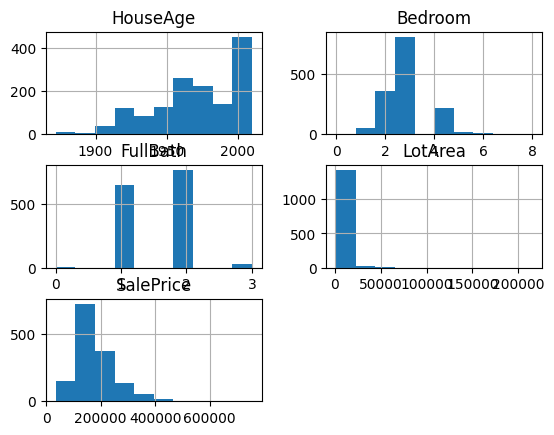

In [8]:
df.hist()

In [9]:
from datetime import datetime
current_year = datetime.now().year
current_year

2024

In [10]:
df['Location'].value_counts()

Location
Urban       754
SubUrban    573
Rural       133
Name: count, dtype: int64

In [11]:
from datetime import datetime


In [12]:
house_price.columns

Index(['HouseAge', 'Bedroom', 'FullBath', 'LotArea', 'Location', 'SalePrice'], dtype='object')

In [107]:
def clean_data(data):
    current_year = datetime.now().year
    if 'HouseAge' in data.columns:
        data['age'] = current_year - data['HouseAge']
        data.drop(columns=['HouseAge'], axis=1, errors='ignore', inplace=True)
    data.columns = data.columns.str.lower()
    return data


In [113]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1168, 5), (1168,), (292, 5), (292,))

In [130]:
num_columns = clean_data(X_train).select_dtypes('number').columns
cat_columns = clean_data(X_train).select_dtypes('object').columns
cat_columns


Index(['location'], dtype='object')

In [131]:
num_columns

Index(['bedroom', 'fullbath', 'lotarea', 'age'], dtype='object')

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

In [133]:
numerical_transformer = Pipeline([('scaler', StandardScaler())])
categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

column_transformer = ColumnTransformer(transformers=[('num_transformer', numerical_transformer, num_columns),
                                ('cat_transformer', categorical_transformer, cat_columns)])
data_cleaner = FunctionTransformer(clean_data)

In [134]:
# scaler = make_pipeline(StandardScaler())
# categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown='ignore', sparse_output=False))

# column_transformer = ColumnTransformer(transformers=[('scaler', numerical_transformer, num_columns),
#                                 ('cat_tranformer', categorical_transformer, cat_columns)])
# data_cleaner = FunctionTransformer(clean_data)

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from sklearn.
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [136]:
import pdb

In [143]:
# This build the model and perform model evaluation.

def train_and_evaluate_model(model=LinearRegression()):
    # Pipeline includes our data cleaning function, data preprocessor and model.
    pipeline = Pipeline(steps=[
        ('data_cleaner', data_cleaner),
        ('preprocessor', column_transformer),
        ('model', model)
    ])
    
    # This trains the model.
    pipeline.fit(X_train, y_train)
    
    # Make prediction
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Evaluation of the model with the train data with the model.
    train_score = np.round(pipeline.score(X_train, y_train), 2)
    mae_train = np.round(mean_absolute_error(y_train, y_train_pred), 2)
    rmse_train = np.round(math.sqrt(mean_squared_error(y_train, y_train_pred)), 2)
    
    # Evaluation of the model with the test data.
    test_score = np.round(pipeline.score(X_test, y_test), 2)
    mae_test = np.round(mean_absolute_error(y_test, y_test_pred), 2)
    rmse_test = np.round(math.sqrt(mean_squared_error(y_test, y_test_pred)), 2)
    
    # Print the accuracy scores.
    print(f'Train accuracy: {(train_score)}')
    print(f'Test accuracy:{(test_score)}\n')
    
    print(f'Train MAE: {mae_train}')
    print(f'Test MAE: {mae_test}\n')

    print(f'Train RMSE: {rmse_train}')
    print(f'Test RMSE: {rmse_test}')
    
    return pipeline
    

In [144]:
train_and_evaluate_model()

Train accuracy: 0.44
Test accuracy:0.46

Train MAE: 39558.96
Test MAE: 41893.74

Train RMSE: 57724.46
Test RMSE: 64340.17


Pipeline(steps=[('data_cleaner',
                 FunctionTransformer(func=<function clean_data at 0x000001813183EFC0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['bedroom', 'fullbath', 'lotarea', 'age'], dtype='object')),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['location'], dtype='object'))])),
                ('model', LinearRegression())])

In [141]:
train_and_evaluate_model(DecisionTreeRegressor())

Train accuracy: 1.0
Test accuracy:0.57

Train MAE: 268.9
Test MAE: 40781.95

Train RMSE: 2126.75
Test RMSE: 57724.29


Pipeline(steps=[('data_cleaner',
                 FunctionTransformer(func=<function clean_data at 0x000001813183EFC0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['bedroom', 'fullbath', 'lotarea', 'age'], dtype='object')),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['location'], dtype='object'))])),
                ('model', DecisionTreeRegressor())])

In [142]:
train_and_evaluate_model(RandomForestRegressor())

Train accuracy: 0.94
Test accuracy:0.69

Train MAE: 12454.07
Test MAE: 33655.52

Train RMSE: 18277.45
Test RMSE: 48468.15


Pipeline(steps=[('data_cleaner',
                 FunctionTransformer(func=<function clean_data at 0x000001813183EFC0>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['bedroom', 'fullbath', 'lotarea', 'age'], dtype='object')),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['location'], dtype='object'))])),
                ('model', RandomForestRegressor())])

In [72]:
train_and_evaluate_model(GradientBoostingRegressor())

Train accuracy: 0.78
Test accuracy:0.65

Train MAE: 25978.12
Test MAE: 34971.86

Train RMSE: 36061.93
Test RMSE: 51666.69


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['HouseAge', 'Bedroom', 'FullBath', 'LotArea'], dtype='object')),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Location'], dtype='object'))])),
                ('model', GradientBoostingRegressor())])

In [145]:
pipeline = train_and_evaluate_model(GradientBoostingRegressor())

Train accuracy: 0.78
Test accuracy:0.65

Train MAE: 25978.12
Test MAE: 34961.6

Train RMSE: 36061.93
Test RMSE: 51672.25


In [147]:
import joblib
joblib.dump(pipeline, 'model.joblib')

['model.joblib']

In [150]:
X_train

,bedroom,fullbath,lotarea,location,age
254,3,1,8400,SubUrban,67
1066,3,2,7837,Urban,31
638,2,1,8777,Rural,114
799,3,1,7200,SubUrban,87
380,3,2,5000,Urban,100
...,...,...,...,...,...
1095,3,2,9317,SubUrban,18
1130,4,2,7804,Urban,96
1294,2,1,8172,Urban,69
860,3,1,7642,Urban,106


In [153]:
X_train.describe()

,bedroom,fullbath,lotarea,age
count,1168.000000,1168.000000,1168.000000,1168.000000
mean,2.890411,1.577055,10689.642123,53.034247
std,0.804855,0.546912,10759.366198,30.675495
min,0.000000,0.000000,1300.000000,14.000000
25%,2.000000,1.000000,7587.250000,23.000000
50%,3.000000,2.000000,9600.000000,52.000000
75%,3.000000,2.000000,11700.000000,71.000000
max,8.000000,3.000000,215245.000000,152.000000


In [154]:
X_train.columns

Index(['bedroom', 'fullbath', 'lotarea', 'location', 'age'], dtype='object')

In [151]:


import pandas as pd
import joblib
import numpy as np
import streamlit as st
#from data_cleaner import clean_data

model = joblib.load('model.joblib')
def collect_user_input():
    bedroom = st.number_input('No of Bedrooms', min_value=0, max_value=20, value='min')
    fullbath = st.number_input('No of Bathrooms', min_value=0, max_value=10, value='min')
    lotarea= st.number_input('Area(sqft)', min_value=0, max_value=500000, value='min')
    age = st.number_input('How old is the house(years)?', min_value=0, max_value=200, value='min')
    location = st.selectbox('Location', options=['Urban', 'SubUrban', 'Rural'])

    input_data = pd.DataFrame(data= [[bedroom, fullbath, lotarea, location, age]],
        columns=['bedroom', 'fullbath', 'lotarea', 'location', 'age'])
    return input_data

st.title('House Price Prediction App')
st.write('Predict the price of an apartment')
input_data = collect_user_input()
if st.button('Predict'):
    with st.spinner('Calculating the price of an apartment'):
        prediction = model.predict(input_data)
        st.success(f'The apaprtment would cost around USD{np.round(prediction)}.')

In [165]:
X_train['location'].value_counts()

location
Urban       587
SubUrban    467
Rural       114
Name: count, dtype: int64

In [155]:
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
) -> 'None'
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index. This alignment also
    occurs if data is a Series or a DataFrame itself. Alignment is done on
    Series/DataFrame inputs.

    If data is a list of dicts, column order follows 